## Ex 4.1  
  
- In Example 4.1, if $\pi$ is the equiprobable random policy, what is $q_\pi$(11, down)? What is $q_\pi$(7, down)?

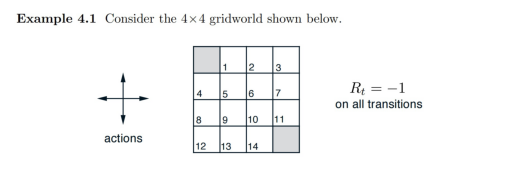

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt


# 打开本地图片，需将其替换为实际的图片路径
image = Image.open('/Users/erxiong/Documents/GitHub/ReinforcementLearning-R.S./Chapter4-DynamicProgramming/Exercise4.1-/image/ex4.1.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
import numpy as np

def transState(i, j):   
    left = [i - 1, j] if i - 1 >= 0 else [i, j]
    right = [i + 1, j] if i + 1 <= 3 else [i, j]
    up = [i, j + 1] if j + 1 <= 3 else [i, j]
    down = [i, j - 1] if j - 1 >= 0 else [i, j]

    return [left, right, up, down]

stateValue = np.zeros(16).reshape(4,4)

# bellman equation for state value iteration
def mdp(stateValue, i, j):
    next_ids = transState(i, j)
    sv = 0

    for id_ in next_ids:
        sv += stateValue[id_[0], id_[1]]
    
    sv *= 0.25
    sv += -1
    return sv


def update(stateValue, delta = 1e-4):
    for i in range(4):
        for j in range(4):
            if i == 0 and j == 0 or i == 3 and j == 3:
                continue
            
            sv = mdp(stateValue, i, j)
            
            if np.abs(stateValue[i, j] - sv) > delta:
                stateValue[i, j] = sv
    return


def update_reverse(stateValue, delta = 1e-4):
    for i in range(3, 0, -1):
        for j in range(3, 0, -1):
            if i == 0 and j == 0 or i == 3 and j == 3:
                continue
            
            sv = mdp(stateValue, i, j)
            
            if np.abs(stateValue[i, j] - sv) > delta:
                stateValue[i, j] = sv

    return


k = int(input("Specify the desired training loop count(0-10000):"))

while k:
    if np.random.random() > 0.5:
        update_reverse(stateValue)
    else:
        update(stateValue)
    
    k -= 1

print(stateValue)

[[  0.         -13.99894903 -19.99854977 -21.99841276]
 [-13.99894903 -17.99868419 -19.99855082 -19.99854295]
 [-19.99854977 -19.99855082 -17.99878917 -13.99902751]
 [-21.99841276 -19.99854295 -13.99902751   0.        ]]


In [ ]:
import numpy as numpy

class State: # class for each unit on the game
    def __init__(self, _id):
        self.value = 0
        self.id = _id
        self.left_bound = max(1, (self.id // 4) * 4)  # save the left border
        self.right_bound =  min(14, (self.id // 4) * 4 + 3) # save the right border
        self.nextS = [self.move('L'), self.move('R'), self.move('U'), self.move('D')]

    def move(self, u):  # get next S
        if u == 'L':  # move left
            if self.id - 1 >= self.left_bound:
                return self.id - 1
            elif self.id - 1 == 0:
                return 0
            else:
                return self.id
        if u == 'R':  # move right
            if self.id + 1 <= self.right_bound:
                return self.id + 1
            elif self.id + 1 == 15:
                return 0
            else:
                return self.id
        if u == 'U':  # move up
            if self.id - 4 >= 1:
                return self.id - 4
            elif self.id - 4 == 0:
                return 0
            else:
                return self.id
        if u == 'D':  # move down
            if self.id + 4 <= 14:
                return self.id + 4
            elif self.id + 4 == 15:
                return 0
            else:
                return self.id

    def update(self, S):  # S is the whole set of the States.
        V = 0
        for i in range(0, 4):
            V += S[self.nextS[i]].value
        self.value = -1+0.25 * V

def train(k=10):
    V  = []
    S_T = State(0)
    S = {0: S_T}
    for j in range(1, 15):
        S[j] = State(j)
    for loop in range(k):
        if loop>=1000 and loop%1000 == 0:
            print("Training "+str(loop)+"'s loop.......Remaining: "+str(k-loop)+ " loops")
        n = numpy.random.random()
        if n > 0.5:
            for j in range(1, 15):
                S[j].update(S)
        else:
            for j in range(14, 0, -1):
                S[j].update(S)
    for t in range(0,16):
        if t == 0 or t == 15:
            V.append("0")
        else:
            V.append(S[t].value)
    draw(V)


def draw(valueArray):
    for i in range(4):
        print("----------------------")
        print("| "+str(int(valueArray[i*4]))+" | "+str(int(valueArray[i*4+1])) +" | "+str(int(valueArray[i*4+2])) +" | "+str(int(valueArray[i*4+3])) +" |")
    print("----------------------")
    print("Accurate State Values List:")
    for i in range(1,8):
        print("State "+str(2*i-1)+": "+str(valueArray[2*i-1])+ "          State "+str(2*i)+": "+str(valueArray[2*i]))

if __name__ == '__main__':
    k = input("Specify the desired training loop count(0-10000):")
    train(int(k))

Training 1000's loop.......Remaining: 9000 loops
Training 2000's loop.......Remaining: 8000 loops
Training 3000's loop.......Remaining: 7000 loops
Training 4000's loop.......Remaining: 6000 loops
Training 5000's loop.......Remaining: 5000 loops
Training 6000's loop.......Remaining: 4000 loops
Training 7000's loop.......Remaining: 3000 loops
Training 8000's loop.......Remaining: 2000 loops
Training 9000's loop.......Remaining: 1000 loops
----------------------
| 0 | -13 | -19 | -21 |
----------------------
| -13 | -17 | -19 | -19 |
----------------------
| -19 | -19 | -17 | -13 |
----------------------
| -21 | -19 | -13 | 0 |
----------------------
Accurate State Values List:
State 1: -13.999999999999986          State 2: -19.99999999999998
State 3: -21.99999999999998          State 4: -13.999999999999986
State 5: -17.999999999999982          State 6: -19.99999999999998
State 7: -19.99999999999998          State 8: -19.99999999999998
State 9: -19.99999999999998          State 10: -17.99

In [ ]:
import numpy as numpy

class State: # class for each unit on the game
    def __init__(self, _id):
        self.value = 0
        self.id = _id
        self.left_bound = max(1, (self.id // 4) * 4)  # save the left border
        self.right_bound =  min(14, (self.id // 4) * 4 + 3) # save the right border
        self.nextS = [self.move('L'), self.move('R'), self.move('U'), self.move('D')]


    def move(self, u):  # get next S
        if u == 'L':  # move left
            if self.id - 1 >= self.left_bound:
                return self.id - 1
            elif self.id - 1 == 0:
                return 0
            elif self.id == 16:
                return 16
            else:
                return self.id
        if u == 'R':  # move right
            if self.id + 1 <= self.right_bound:
                return self.id + 1
            elif self.id + 1 == 15:
                return 0
            elif self.id == 16:
                return 16
            else:
                return self.id
        if u == 'U':  # move up
            if self.id - 4 >= 1:
                return self.id - 4
            elif self.id - 4 == 0:
                return 0
            elif self.id == 16:
                return 13
            else:
                return self.id
        if u == 'D':  # move down
            if self.id + 4 <= 14:
                return self.id + 4
            elif self.id + 4 == 15:
                return 0
            elif self.id == 13:
                return 16
            else:
                return self.id

    def update(self, S):  # S is the whole set of the States.
        V = 0
        for i in range(0, 4):
            V += S[self.nextS[i]].value
            
        self.value = -1+0.25 * V

def train(k=10):
    V  = []
    S_T = State(0)
    S = {0: S_T}

    # 1: 14
    for j in range(1, 15):
        S[j] = State(j)
        
    S[16] = State(16)
    
    for loop in range(k):
        if loop>=1000 and loop%1000 == 0:
            print("Training "+str(loop)+"'s loop.......Remaining: "+str(k-loop)+ " loops")
        n = numpy.random.random()
        if n > 0.5:
            for j in range(1, 15):
                S[j].update(S)
        else:
            for j in range(14, 0, -1):
                S[j].update(S)
        S[16].update(S)
    
    # 画图
    for t in range(0,17):
        if t == 0 or t == 15:
            V.append("0")
        else:
            V.append(S[t].value)
    draw(V)


def draw(valueArray):
    for i in range(4):
        print("----------------------")
        print("| "+str(int(valueArray[i*4]))+" | "+str(int(valueArray[i*4+1])) +" | "+str(int(valueArray[i*4+2])) +" | "+str(int(valueArray[i*4+3])) +" |")
    print("----------------------")
    print("|    | "+str(int(valueArray[16])) +" |    |   |")
    print("----------------------")
    print("Accurate State Values List:")
    for i in range(1,8):
        print("State "+str(2*i-1)+": "+str(valueArray[2*i-1])+ "          State "+str(2*i)+": "+str(valueArray[2*i]))

if __name__ == '__main__':
    k = input("Specify the desired training loop count(0-10000):")
    train(int(k))

Training 1000's loop.......Remaining: 9000 loops
Training 2000's loop.......Remaining: 8000 loops
Training 3000's loop.......Remaining: 7000 loops
Training 4000's loop.......Remaining: 6000 loops
Training 5000's loop.......Remaining: 5000 loops
Training 6000's loop.......Remaining: 4000 loops
Training 7000's loop.......Remaining: 3000 loops
Training 8000's loop.......Remaining: 2000 loops
Training 9000's loop.......Remaining: 1000 loops
----------------------
| 0 | -14 | -21 | -23 |
----------------------
| -15 | -19 | -21 | -21 |
----------------------
| -22 | -22 | -19 | -14 |
----------------------
| -25 | -24 | -15 | 0 |
----------------------
|    | -29 |    |   |
----------------------
Accurate State Values List:
State 1: -14.864069264069247          State 2: -21.11341991341989
State 3: -23.125541125541098          State 4: -15.269264069264054
State 5: -19.47878787878786          State 6: -21.350649350649327
State 7: -21.137662337662313          State 8: -22.329004329004306
State